In [21]:
#Analysis of Multilingual Public Response on E-learning Using Long Short-Term Memory

import numpy as np # linear algebra
import pandas as pd # data processing

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [22]:
# data = pd.read_csv('/kaggle/input/englishresampled/EnglishResampled.csv')
data = pd.read_csv('/kaggle/input/banglaresampled/BanglaResampled.csv')
# data = pd.read_csv('/kaggle/input/banglishresampled/BanglishResampled.csv')

In [23]:
data = data[data.sentiment != "neutral"] # dropping the 'Neutral' sentiments
data['text'] = data['text'].astype(str)  # convert to string data type
data['text'] = data['text'].apply(lambda x: x.lower())
# data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 'positive'].size)
print(data[ data['sentiment'] == 'negative'].size)

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ') # convert text into Sequences so the Network can deal with it as input
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

data.head()

1964
1998


,text,sentiment
0,10 minute school আপনারা সত্যিই অতুলনীয় আমাদের...,positive
2,মানুষের জীবনে অনেক কিছুই আছে মানুষকে শেখানো লা...,positive
3,আমার কথা বললে অনেক ভালো লাগে,positive
5,অনেক সুন্দর হইছে,positive
6,শিক্ষণীয়,positive


In [24]:
# embed_dim = 128
# lstm_out = 196

embed_dim = 100
lstm_out = 128

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 115, 100)          200000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 115, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 317,506
Trainable params: 317,506
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
data['sentiment'] = np.where(data['sentiment'] == 'positive', 1, 0)
Y = pd.get_dummies(data['sentiment']).values

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model.summary()

(1331, 115) (1331, 2)
(657, 115) (657, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                7424      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 7,554
Trainable params: 7,554
Non-trainable params: 0
_________________________________________________________________


Train on 1064 samples, validate on 267 samples
Epoch 1/200
 - 0s - loss: 5.5141 - acc: 0.5188 - val_loss: 6.1669 - val_acc: 0.4719
Epoch 2/200
 - 0s - loss: 5.2888 - acc: 0.5385 - val_loss: 5.9054 - val_acc: 0.5169
Epoch 3/200
 - 0s - loss: 5.0289 - acc: 0.5667 - val_loss: 5.6933 - val_acc: 0.5393
Epoch 4/200
 - 0s - loss: 5.3117 - acc: 0.5667 - val_loss: 6.2507 - val_acc: 0.4869
Epoch 5/200
 - 0s - loss: 5.1078 - acc: 0.5742 - val_loss: 5.6512 - val_acc: 0.5243
Epoch 6/200
 - 0s - loss: 4.9203 - acc: 0.5874 - val_loss: 6.5782 - val_acc: 0.5056
Epoch 7/200
 - 0s - loss: 5.2243 - acc: 0.5583 - val_loss: 5.3437 - val_acc: 0.5356
Epoch 8/200
 - 0s - loss: 4.6518 - acc: 0.5930 - val_loss: 6.0165 - val_acc: 0.4869
Epoch 9/200
 - 0s - loss: 5.4796 - acc: 0.5479 - val_loss: 6.3926 - val_acc: 0.5356
Epoch 10/200
 - 0s - loss: 5.6307 - acc: 0.5620 - val_loss: 6.1517 - val_acc: 0.5318
Epoch 11/200
 - 0s - loss: 4.6477 - acc: 0.6128 - val_loss: 5.6299 - val_acc: 0.5468
Epoch 12/200
 - 0s - loss: 

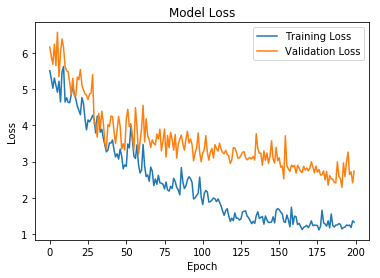

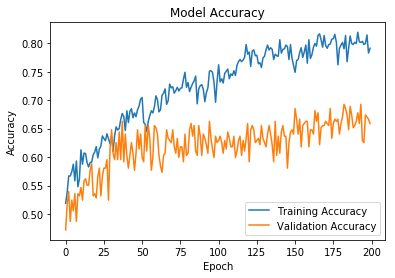

In [26]:
batch_size = 32
epochs = 200

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=2, 
                    validation_split=0.2)

# Evaluate the model on the test data
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=batch_size)

# Print the final score and accuracy
print("Test score: %.2f" % score)
print("Test accuracy: %.2f" % acc)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()


In [ ]:
# validation_size = 1600
validation_size = 200

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=batch_size)

print("score: %.2f" % score)
print("acc: %.2f" % acc)

In [28]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 72.22222222222221 %
neg_acc 66.30434782608695 %


In [347]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 151, 100)          200000    
_________________________________________________________________
spatial_dropout1d_29 (Spatia (None, 151, 100)          0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 128)               117248    
_________________________________________________________________
dense_81 (Dense)             (None, 2)                 258       
Total params: 317,506
Trainable params: 317,506
Non-trainable params: 0
_________________________________________________________________


In [31]:
# sentence = ["thank you so much"]
# sentence = ["sound quality is bad"]

sentence = ["খুবই সুন্দর প্রতিভা আপনার"]
# sentence = ["এদের সার্ভিস খুবই বাজে"]

# sentence = ["Vaiya onek dhonnobad"]
# sentence = ["faltu tutorial"]

print(sentence)

#vectorizing the sentence by the pre-fitted tokenizer instance
sentence = tokenizer.texts_to_sequences(sentence)

#padding the sentence to have exactly the same shape as `embedding_2` input

# sentence = pad_sequences(sentence, maxlen=151, dtype='int32', value=0)
sentence = pad_sequences(sentence, maxlen=115, dtype='int32', value=0)
# sentence = pad_sequences(sentence, maxlen=100, dtype='int32', value=0)

print(sentence)
sentiment = model.predict(sentence,batch_size=1,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
    

['খুবই সুন্দর প্রতিভা আপনার']
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 70 12  3]]
[ 0.09769358  0.90230638]
positive


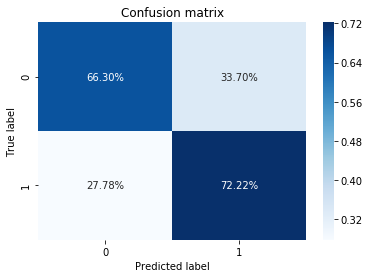

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# predict sentiment for validation set
y_pred = model.predict(X_validate)

# convert predictions to sentiment labels (0 or 1)
y_pred = np.argmax(y_pred, axis=1)

# convert actual sentiment to labels (0 or 1)
y_true = np.argmax(Y_validate, axis=1)

# create confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# calculate percentages
confusion_mat_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]

# plot confusion matrix as heatmap
sns.heatmap(confusion_mat_percent, annot=True, fmt='.2%', cmap='Blues')

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

# show plot
plt.show()

Precision: 0.715596330275
Recall: 0.722222222222
F1 Score: 0.718894009217


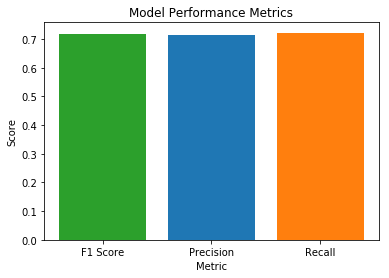

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# predict sentiment for validation set
y_pred = model.predict(X_validate)

# convert predictions to sentiment labels (0 or 1)
y_pred = np.argmax(y_pred, axis=1)

# convert actual sentiment to labels (0 or 1)
y_true = np.argmax(Y_validate, axis=1)

# calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# data to plot
scores = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1 Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# plot the bar chart
plt.bar(labels, scores, color=colors)

# add title and axis labels
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')

# display the plot
plt.show()


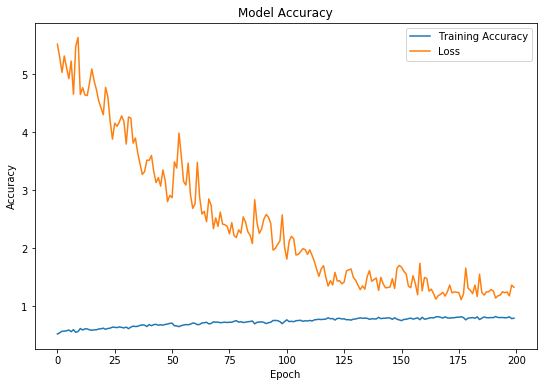

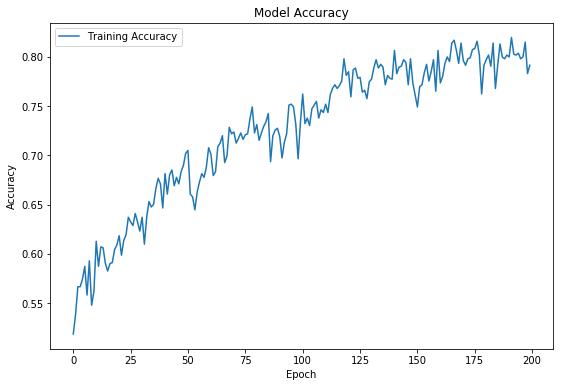

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(model.history.history['acc'], label='Training Accuracy')
plt.plot(model.history.history['loss'], label='Loss')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(9,6))
plt.plot(model.history.history['acc'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
